In [56]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

kernel = [[0.12, 0.14, 0.22], [0.91, 0.44, 0.31], [0.77, 0.51, 0.13]]
image = [[0.5, 0.5, 0.3, 0.2, 0.1], [0.3, 0.2, 0.8, 0.9, 1.0], [0.7, 0.7, 0.5, 1.0, 1.0], [0.6, 0.6, 0.4, 0.9, 1.0], [0.1, 0.4, 0.6, 0.7, 0.8]]
image = np.array(image)
kernel = np.array(kernel)

# subset = image[0:3, 0:3]
def convolve(img, kernel):
    img = np.array(img)
    # print(img)
    image_size_x = img.shape[0]
    image_size_y = img.shape[1]
    kernel_size = kernel.shape[1]
    # print(kernel.shape)
    offset = kernel_size - 1
    convolved_image_arr = []
    for j in range(0, image_size_x-offset):
        new_image_row = []
        # print(j)
        for i in range(0, image_size_y-offset):
            # print(i)
            image_subset = img[i:i+kernel_size, j:j+kernel_size]
            # print(image_subset)
            result_matrix = np.multiply(image_subset, kernel)
            result_sum = np.sum(result_matrix)
            new_image_row.append(result_sum)
        convolved_image_arr.append(new_image_row)  
    return np.array(convolved_image_arr)  
# print(kernel.shape)
# print(new_arr)
# print(np.array(new_arr).shape)
# new_arr

def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

def convert_neg_values_to_zero(img):
    img = img.copy()
    img[img < 0] = 0
    return img



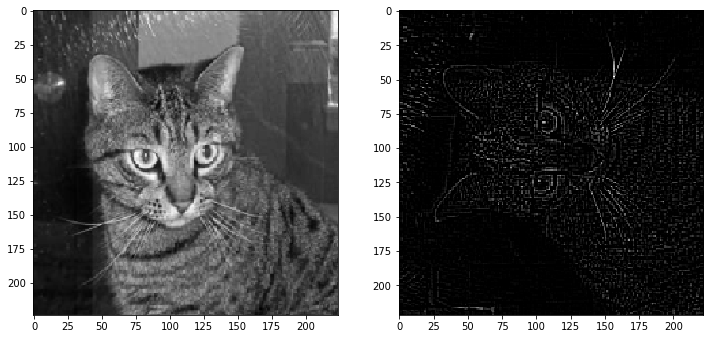

In [57]:
img = Image.open('cat.png')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))

outline_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
# print(np.array(img).shape)
# convolve(image, kernel)
convolved_img = convolve(img, outline_kernel)
plot_two_images(np.array(img), convert_neg_values_to_zero(convolved_img))
